Heatmap
==

In [3]:
data_files = []
data_files.append('/Users/simon/git/burns/notebooks/spreadsheets/ink_v_ink/ink_v_ink_log_1e-05_tus.csv')
data_files.append('/Users/simon/git/burns/notebooks/spreadsheets/paper_v_paper/paper_v_paper_log_1e-05_tus.csv')
data_files.append('/Users/simon/git/burns/notebooks/spreadsheets/both_v_both/both_v_both_log_1e-05_tus.csv')

In [4]:
peaks = [
    113.9639,
    130.5259,
    207.0654,
    208.0688, #
    230.9904,
    243.0993,
    258.0286,
    272.0655, #
    283.1178,
    284.1214, #
    305.0996,
    305.1281, #
    327.0782, 
    328.0816, #
    328.1794, 
    344.1049, 
    345.1081, #
    349.0602, 
    364.9642, 
    377.2091, 
]

# Following list is the new peaks, produced for the revised manuscript - 10th May 2018


peaks = [207.0654,
        273.0289,
        283.1178,
        291.0842,
        305.0996,
        327.0782,
        344.1049,
        349.0602,
        113.9639,
        130.5259,
        230.9904,
        243.0993,
        258.0286,
        328.1794,
        364.9642,
        377.2091]

NMASS = 1.008664
for i in peaks:
    for j in peaks:
        if abs(i-j)<2 and abs(i-j)>0:
            print i,j,abs(i-j),NMASS

327.0782 328.1794 1.1012 1.008664
328.1794 327.0782 1.1012 1.008664


In [5]:
import csv
data = {}
heads = {}
for fi in data_files:
    with open(fi,'r') as f:
        reader = csv.reader(f)
        heads[fi] = reader.next()
        data[fi] = {}
        for row in reader:
            data[fi][row[0]]=row

In [6]:
import numpy as np
found = []
plot_data = []
for fi in data:
    for mz,row in data[fi].items():
        f = filter(lambda x: mz.startswith(str(x)[:-1]),peaks)
        if len(f) == 1 and not mz in found:
#             print f
#         if float(row[-1]) <= 0.05 and not mz in found:
            plot_data.append(data['/Users/simon/git/burns/notebooks/spreadsheets/both_v_both/both_v_both_log_1e-05_tus.csv'][mz][1:-3])
            found.append(mz)
new_plot = []
for row in plot_data:
    new_row = []
    for r in row:
        if not r == 'nan':
            new_row.append(float(r))
        else:
            new_row.append(0.0)
    mnr = max(new_row)
    new_row = [m/mnr for m in new_row]
    new_plot.append(new_row)
new_plot = np.array(new_plot)

print sorted([float(x) for x in found])
print sorted(peaks)
print len(found),len(peaks)

[113.96390857609977, 130.52593666426978, 207.06541002325974, 230.9904123252886, 243.09934515879692, 258.0286347444263, 273.02889781226355, 283.1177664655883, 291.08417619015677, 305.0996424997124, 327.0782204558983, 328.17935362585155, 344.1048564438347, 349.0602078719774, 364.9641672708975, 377.2091481159859]
[113.9639, 130.5259, 207.0654, 230.9904, 243.0993, 258.0286, 273.0289, 283.1178, 291.0842, 305.0996, 327.0782, 328.1794, 344.1049, 349.0602, 364.9642, 377.2091]
16 16


In [7]:
import pylab as plt
%matplotlib inline

([<matplotlib.axis.YTick at 0x10cfd1290>,
 <a list of 16 Text yticklabel objects>)

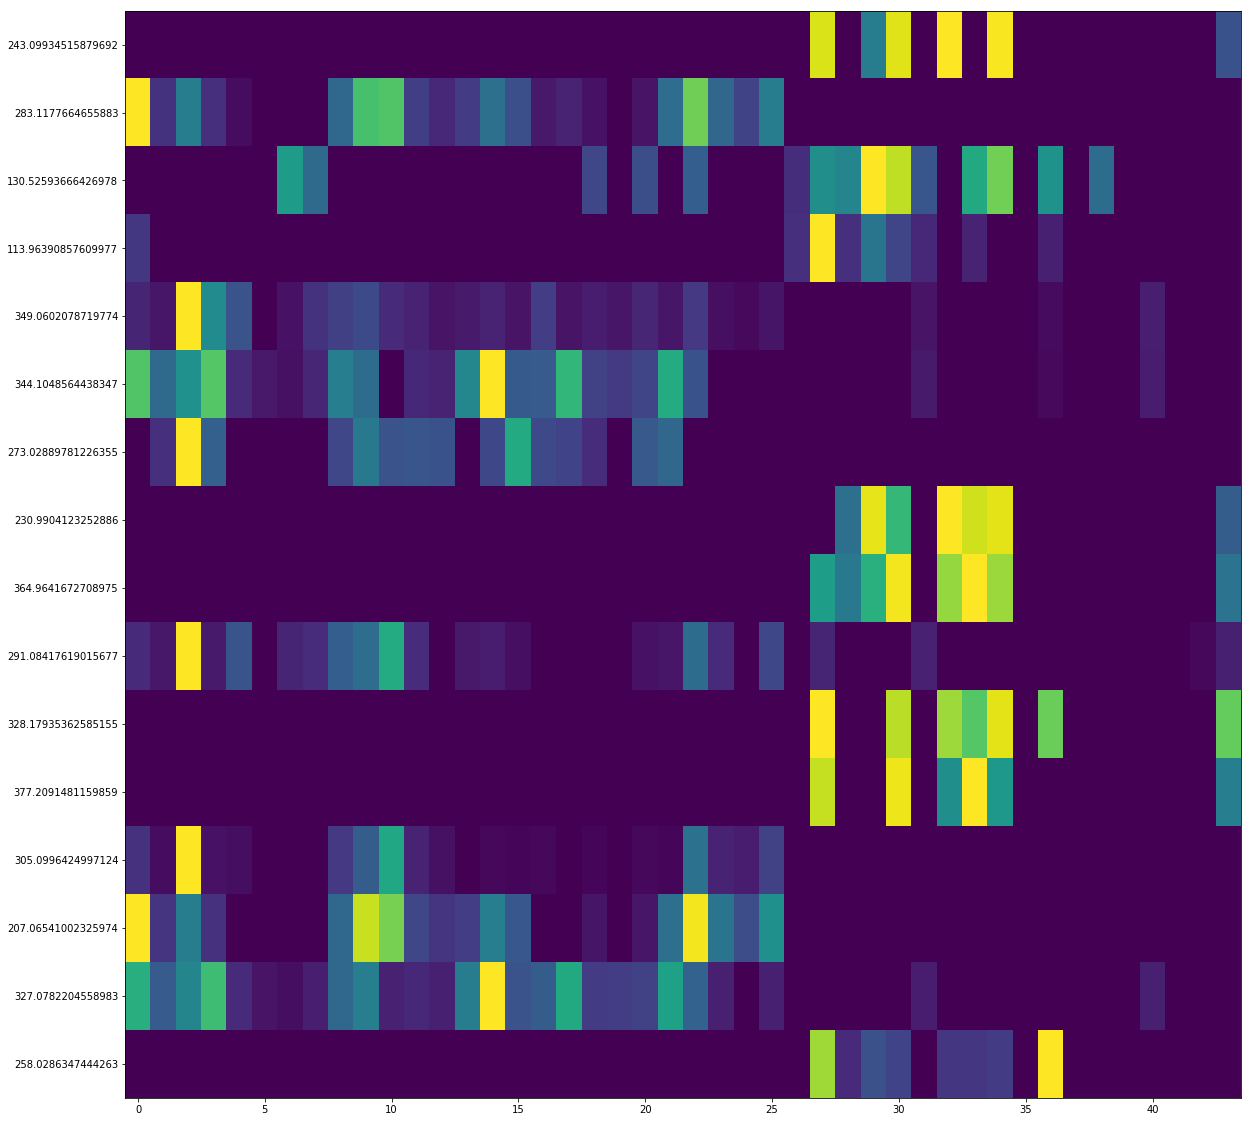

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(new_plot,aspect = 'auto')
plt.yticks(np.arange(len(found)),found)

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(new_plot)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x10bfe1410>)

16
[0 1 0 0 2 1 2 0 0 2 0 0 2 1 1 0]
[(0, 0), (1, 1), (0, 2), (0, 3), (2, 4), (1, 5), (2, 6), (0, 7), (0, 8), (2, 9), (0, 10), (0, 11), (2, 12), (1, 13), (1, 14), (0, 15)]
[(0, 0), (0, 2), (0, 3), (0, 7), (0, 8), (0, 10), (0, 11), (0, 15), (1, 1), (1, 5), (1, 13), (1, 14), (2, 4), (2, 6), (2, 9), (2, 12)]
(0, 2, 3, 7, 8, 10, 11, 15, 1, 5, 13, 14, 4, 6, 9, 12)


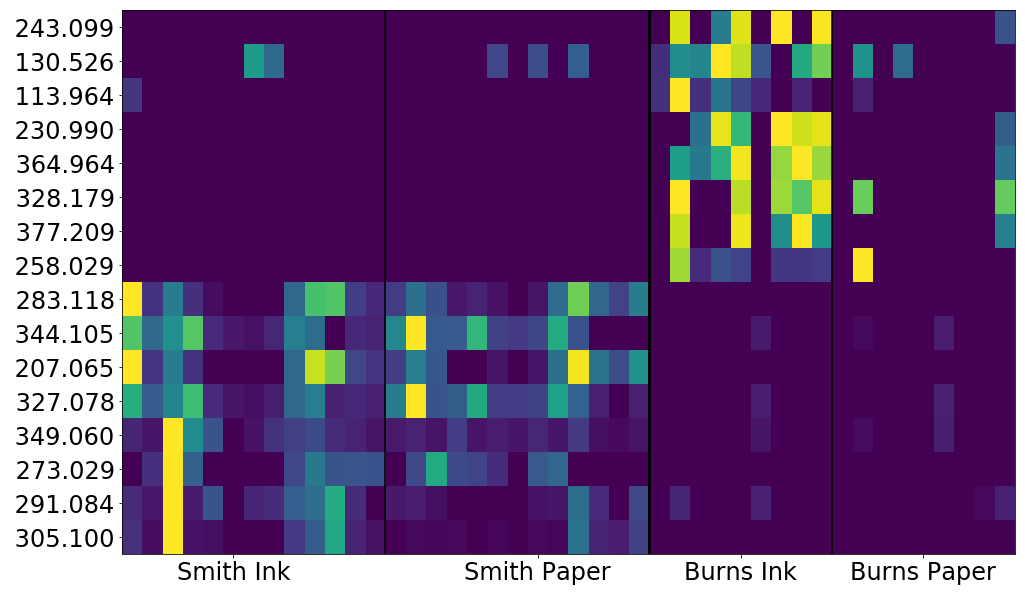

In [11]:
print len(found)
ar = zip(list(ac.labels_),range(len(ac.labels_)))
print ac.labels_
print ar
ar = sorted(ar,key = lambda x: x[0])
print ar
_,s_index = zip(*ar)
print s_index

end_point = len(found)-0.5
plt.figure(figsize=(16,10))
plt.imshow(new_plot[s_index,:],aspect='auto')
plt.plot([12.5,12.5],[-0.5,end_point],'k')
plt.plot([25.5,25.5],[-0.5,end_point],'k',linewidth=3)
plt.plot([34.5,34.5],[-0.5,end_point],'k')

#re-order the found values
ordered_found = []
for i in s_index:
    ordered_found.append(found[i])

plt.yticks(range(len(found)),["{:8.3f}".format(float(f)) for f in ordered_found],fontsize = 24)
# plt.yticks(range(len(found)),["{:8.3f}".format(float(peaks[s])) for s in s_index],fontsize = 24)
plt.xticks([5,20,30,39],('Smith Ink','Smith Paper','Burns Ink','Burns Paper'),fontsize=24)
plt.savefig('heatplotexample.png')
plt.savefig('heatplotexample.pdf')

Now match the Goldsmith peaks

In [19]:
goldsmith_data = {}
with open('spreadsheets/goldsmith/goldsmith_log_1e-05_tus.csv','r') as f:
    reader = csv.reader(f)
    heads = reader.next()
    for line in reader:
        goldsmith_data[line[0]] = line

In [20]:
gData = np.zeros((len(found),4),np.double)
for i,m in enumerate(ordered_found):
    mz = float(m)
    best = None
    ee = 1e6
    for gmz in goldsmith_data:
        gmzf = float(gmz)
        e = 1e6*abs(mz-gmzf)/mz
        if e < ee:
            best = gmz
            ee = e
    if ee < 5:
        td = goldsmith_data[best][1:5]
        td = [0.0 if t == 'nan' else t for t in td]
        gData[i,:] = td



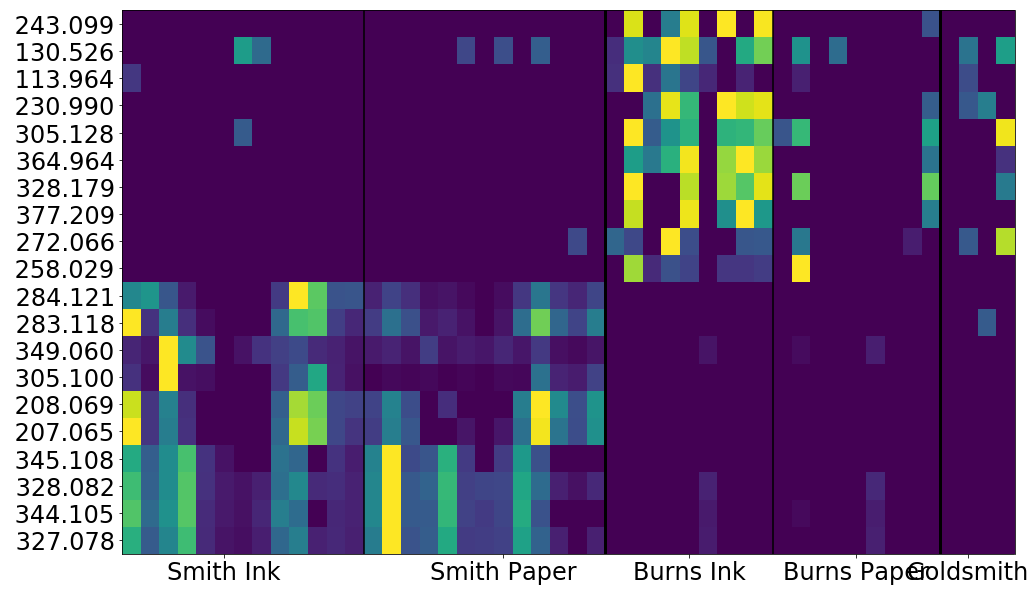

In [21]:
plt.figure(figsize=(16,10))
plt.imshow(np.hstack((new_plot[s_index,:],gData)),aspect='auto')
plt.plot([12.5,12.5],[-0.5,end_point],'k')
plt.plot([25.5,25.5],[-0.5,end_point],'k',linewidth=3)
plt.plot([34.5,34.5],[-0.5,end_point],'k')

plt.plot([43.5,43.5],[-0.5,end_point],'k',linewidth=3)

#re-order the found values
ordered_found = []
for i in s_index:
    ordered_found.append(found[i])

plt.yticks(range(len(found)),["{:8.3f}".format(float(f)) for f in ordered_found],fontsize = 24)
plt.xticks([5,20,30,39,45],('Smith Ink','Smith Paper','Burns Ink','Burns Paper','Goldsmith'),fontsize=24)
plt.savefig('heatplotexample_g.png')
plt.savefig('heatplotexample_g.pdf')